In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prophet as fbp
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Use fivethirtyeight plot style
plt.style.use('fivethirtyeight') 


In [5]:
df = pd.read_csv('data/AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-21,24.395000,24.444000,24.127501,24.400000,24.400000,63636000
1,2015-07-22,24.299500,24.625000,24.245001,24.413500,24.413500,62298000
2,2015-07-23,24.583000,24.583000,23.785000,24.108999,24.108999,187488000
3,2015-07-24,28.949499,29.028500,26.467501,26.471001,26.471001,438188000
4,2015-07-27,26.387501,27.247499,26.330000,26.570499,26.570499,149820000


ABOVE

The df.head() function in pandas returns the first five rows of the DataFrame df. This is a useful method to quickly inspect the data, see the structure, and get a sense of what the data looks like.

Since we need only two columns date and adjusted close price, so, we subset the original dataset to get these columns. Since the data is required in a prophet in the form of two columns named ds (for date column) and y (for data column).

In [6]:
# add two columnsin dataframe having values as Date and Adj Close
df[['ds', 'y']] = df[['Date', 'Adj Close']]
# Subset two columns from data frame
df = df[['ds', 'y']]
 
df.head()

,ds,y
0,2015-07-21,24.400000
1,2015-07-22,24.413500
2,2015-07-23,24.108999
3,2015-07-24,26.471001
4,2015-07-27,26.570499


Now, we split the data frame into train and test data, we will be using 4 years of data for training and a year of data for test purpose.

In [10]:
# split data frame  into two parts train and test
split_date = "2019-02-21"
df_train = df.loc[df.ds <= split_date].copy()
df_test = df.loc[df.ds > split_date].copy()

ABOVE WHY DO WE USE COPY()

In this approach, df_train and df_test are independent copies of the original DataFrame. This means that changes to df_train or df_test will not affect df, and changes to df will not affect df_train or df_test.

Now, we instantiate the Facebook prophet API, this prophet API works similar to scikit-learn. It uses the fit function to fit the dataset into the model and predict function to forecast future values.

In [11]:
# Instantiate prophet 
model = fbp.Prophet()
# fit the training data 
model.fit(df_train)

16:27:31 - cmdstanpy - INFO - Chain [1] start processing
16:27:31 - cmdstanpy - INFO - Chain [1] done processing


Now, we use predict function to forecast the share price for next 1 year.

In [12]:
forecast = model.predict(df_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
98,2019-07-15,87.298901,82.988867,98.241864,80.578611,93.712173,3.053075,3.053075,3.053075,-1.586482,-1.586482,-1.586482,4.639557,4.639557,4.639557,0.0,0.0,0.0,90.351976
99,2019-07-16,87.301673,83.127706,98.686479,80.472118,93.781618,3.562566,3.562566,3.562566,-1.327605,-1.327605,-1.327605,4.890171,4.890171,4.890171,0.0,0.0,0.0,90.864239
100,2019-07-17,87.304446,83.576567,98.973478,80.389287,93.878578,3.832437,3.832437,3.832437,-1.298202,-1.298202,-1.298202,5.130640,5.130640,5.130640,0.0,0.0,0.0,91.136883
101,2019-07-18,87.307219,83.435326,99.065929,80.301414,93.989203,4.076637,4.076637,4.076637,-1.281798,-1.281798,-1.281798,5.358436,5.358436,5.358436,0.0,0.0,0.0,91.383856
102,2019-07-19,87.309991,83.364661,99.323885,80.199029,94.088316,4.066671,4.066671,4.066671,-1.504661,-1.504661,-1.504661,5.571332,5.571332,5.571332,0.0,0.0,0.0,91.376663


As we can see this column contains the date column, predict share price (y_hat), lower and upper estimates of it, trend components, seasonal components (weekly and yearly).

c:\Program Files\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Program Files\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


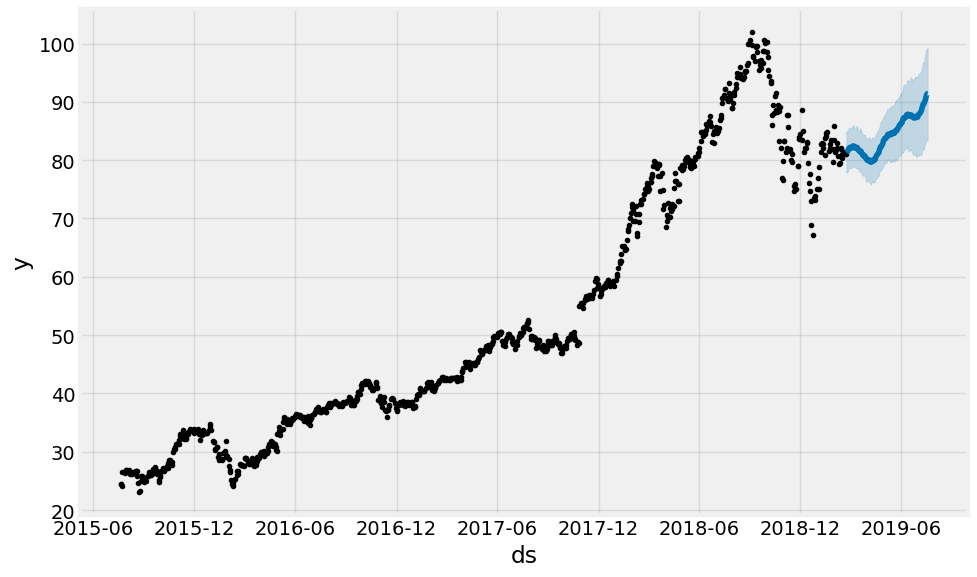

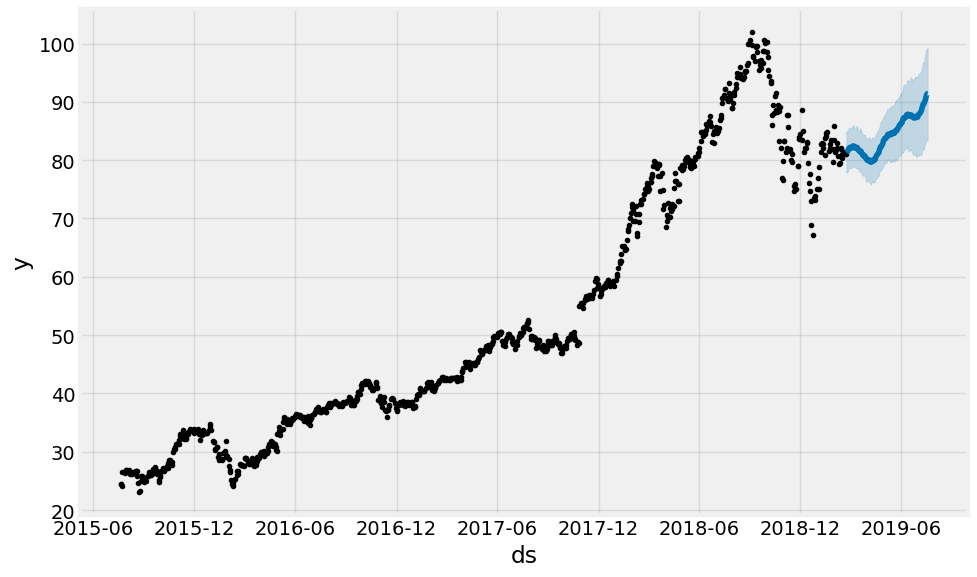

In [13]:
model.plot(forecast)

c:\Program Files\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Program Files\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Program Files\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

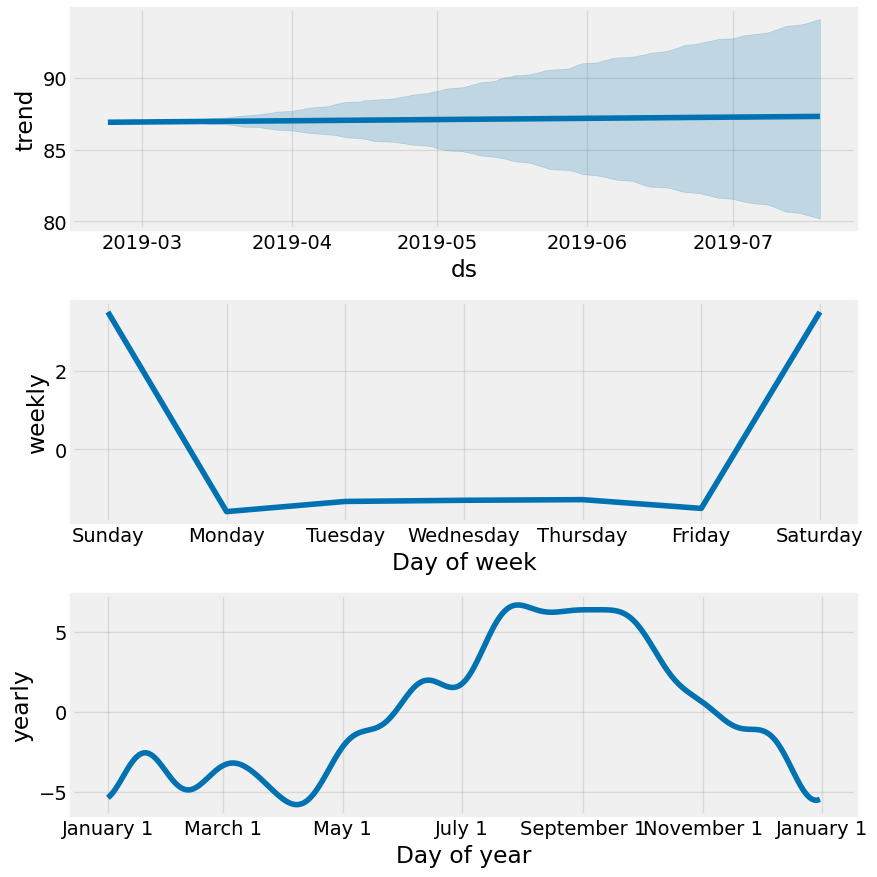

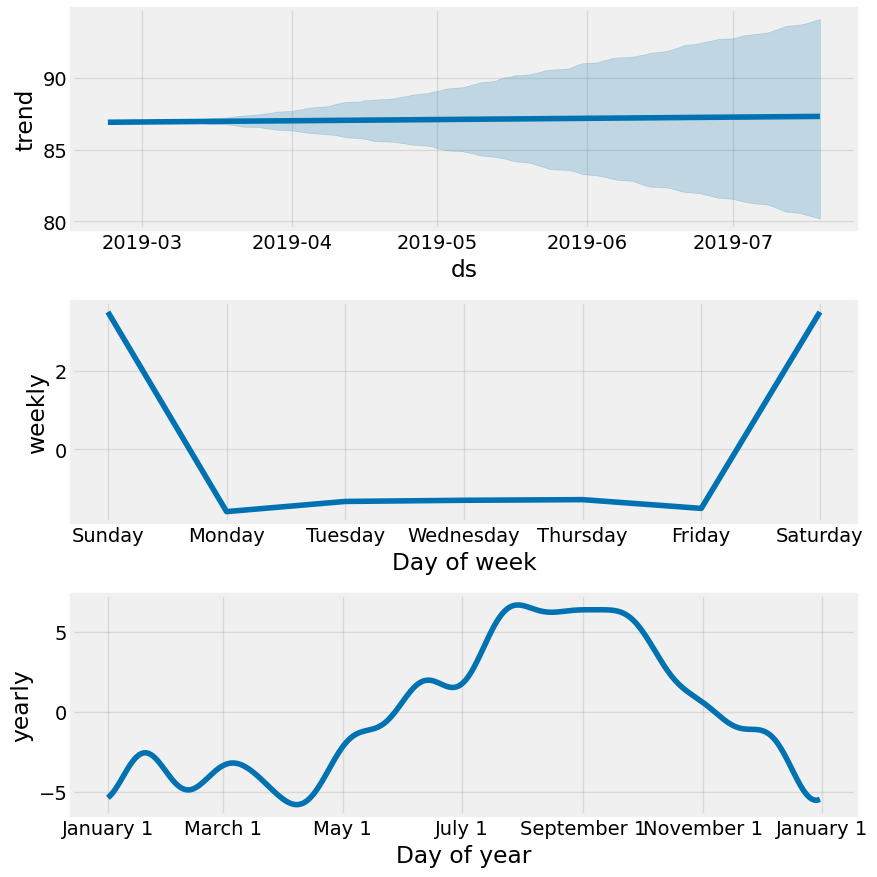

In [14]:
# plot graphs of different components:
model.plot_components(forecast)

Now, we calculate the mean square error and mean absolute error for the forecasted data.

In [15]:
print("Mean Squared Error (MSE):", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))

Mean Squared Error (MSE): 76.09415879511987
Mean Absolute Error (MAE): 7.711742040847392


In [16]:
def mean_abs_perc_err(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
 
print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat'])))

Mean Absolute % Error (MAPE):  8.217850378557912
